# Notebook to create subplots of figures 7, 8, 10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# To Do:
- Remove trailing white space from 'Over the past week, I changed my location after receiving the noise intervention messages. ',

In [2]:
# Setup matplotlib
plt.rcParams.update({'font.size': 16})

### Read and process data

In [3]:
csv_file_path = '../2_processing/7_weekly_survey_with_personality_no_nan_one_response_per_week.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Define phase of experiment
df.loc[df['id_participant'].str.contains('orenth'), 'phase'] = 1
df.loc[df['id_participant'].str.contains('usk'), 'phase'] = 2

# Sort values
df = df.sort_values(by=['id_participant', 'timestamp'])

# Define week in which survey is taken
df['week'] = df.groupby('id_participant').cumcount()+1

# Fix typo
df = df.replace(to_replace='Disgree', value='Disagree')

df_storage = df.copy()

# Define common config data

In [4]:
# Define color palettes
color_palette = [None, None, None]
color_palette[0] = [
    '#135a86', '#1978a5', '#2398b2', '#2fb8bf', '#3fd8ac', '#ecfff1', '#cacaca'
]
color_palette[1] = [
    '#9C4F3F', '#AD604F', '#BE705F', '#CF806F', '#E0907F', '#F5E0D0', '#cacaca'
]
color_palette[2] = [
     '#276419', '#387d32', '#499851', '#5bb36f', '#6dce8d', '#d9fde4', '#ecfff1', '#cacaca'
]


# Define a custom order for responses
my_categories = [None, None]
my_categories[0] = [
    'Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree', 'No intervention messages received', 'No response'
    ]
my_categories[1] = [
    'Always', 'Often', 'Sometimes', 'Seldom', 'Never', 'No intervention messages received', 'No response'
    ]

# Define phases and weeks
phases = [1, 2]
weeks = [1, 2, 3]

meta_data = {
    'fig7': {
        'color_palette': [
            ['#135a86', '#1978a5', '#2398b2', '#2fb8bf', '#3fd8ac', '#ecfff1', '#cacaca'],
            ['#9C4F3F', '#AD604F', '#BE705F', '#CF806F', '#E0907F', '#F5E0D0', '#cacaca']
        ],
        'categories': [
            ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree', 'No intervention messages received', 'No response'],
            ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree', 'No intervention messages received', 'No response']
        ],
        'questions': [
            'The noise and/or temperature intervention messages were helpful to me in understanding how to improve my indoor environmental satisfaction.',
            'The intervention messages were annoying.'
        ]
    },
    'fig8': {
        'color_palette': [
            ['#276419', '#387d32', '#499851', '#5bb36f', '#6dce8d', '#d9fde4', '#ecfff1', '#cacaca'],
            ['#276419', '#387d32', '#499851', '#5bb36f', '#6dce8d', '#d9fde4', '#ecfff1', '#cacaca'],
            ['#276419', '#387d32', '#499851', '#5bb36f', '#6dce8d', '#d9fde4', '#ecfff1', '#cacaca']
        ],
        'categories': [
            ['Always', 'Often', 'Sometimes', 'Seldom', 'Never', 'No intervention messages received', 'No response'],
            ['Always', 'Often', 'Sometimes', 'Seldom', 'Never', 'No intervention messages received', 'No response'],
            ['Always', 'Often', 'Sometimes', 'Seldom', 'Never', 'No intervention messages received', 'No response']
        ],
        'questions': [
            'Over the past week, I changed my location after receiving the noise intervention messages. ',
            'Over the past week, I put on my earphones to mitigate noise distractions after receiving the noise intervention messages.',
            'Over the past week, I changed my location, adjusted the thermostat, fan etc. to feel thermally comfortable after receiving the temperature intervention messages.'
        ]
    },
    'fig10': {
        'color_palette': [
            ['#1E3A5F', '#2E5984', '#3E7BB6', '#66A1E1', '#87CEFA', '#B0E2FF', '#cacaca'],
            ['#1E3A5F', '#2E5984', '#3E7BB6', '#66A1E1', '#87CEFA', '#B0E2FF', '#cacaca'],
            ['#1E3A5F', '#2E5984', '#3E7BB6', '#66A1E1', '#87CEFA', '#B0E2FF', '#cacaca'],
            ['#004C6D', '#00798C', '#00A1C1', '#00C3D6', '#80D5DE', '#B3E4E8', '#cacaca'],
            ['#004C6D', '#00798C', '#00A1C1', '#00C3D6', '#80D5DE', '#B3E4E8', '#cacaca']
        ],
        'categories': [
            ['Always', 'Often', 'Sometimes', 'Seldom', 'Never', 'No intervention messages received', 'No response'], #, 'No intervention messages received'],
            ['Always', 'Often', 'Sometimes', 'Seldom', 'Never', 'No intervention messages received', 'No response'], #, 'No intervention messages received'],
            ['Always', 'Often', 'Sometimes', 'Seldom', 'Never', 'No intervention messages received', 'No response'], #, 'No intervention messages received'],
            ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree', 'No intervention messages received', 'No response'], #, 'No intervention messages received'],
            ['Always', 'Often', 'Sometimes', 'Seldom', 'Never', 'No intervention messages received', 'No response'], #, 'No intervention messages received']
        ],
        'questions': [
            'Over the past week, I changed my location after receiving the noise intervention messages. ',
            'Over the past week, I put on my earphones to mitigate noise distractions after receiving the noise intervention messages.',
            'Over the past week, I changed my location, adjusted the thermostat, fan etc. to feel thermally comfortable after receiving the temperature intervention messages.',
            'The noise and/or temperature intervention messages were helpful to me in understanding how to improve my indoor environmental satisfaction.',
            'Over the past week, I changed my location, adjusted the thermostat, fan etc. to feel thermally comfortable after receiving the temperature intervention messages.'
        ]
    }
}

### Figure 7

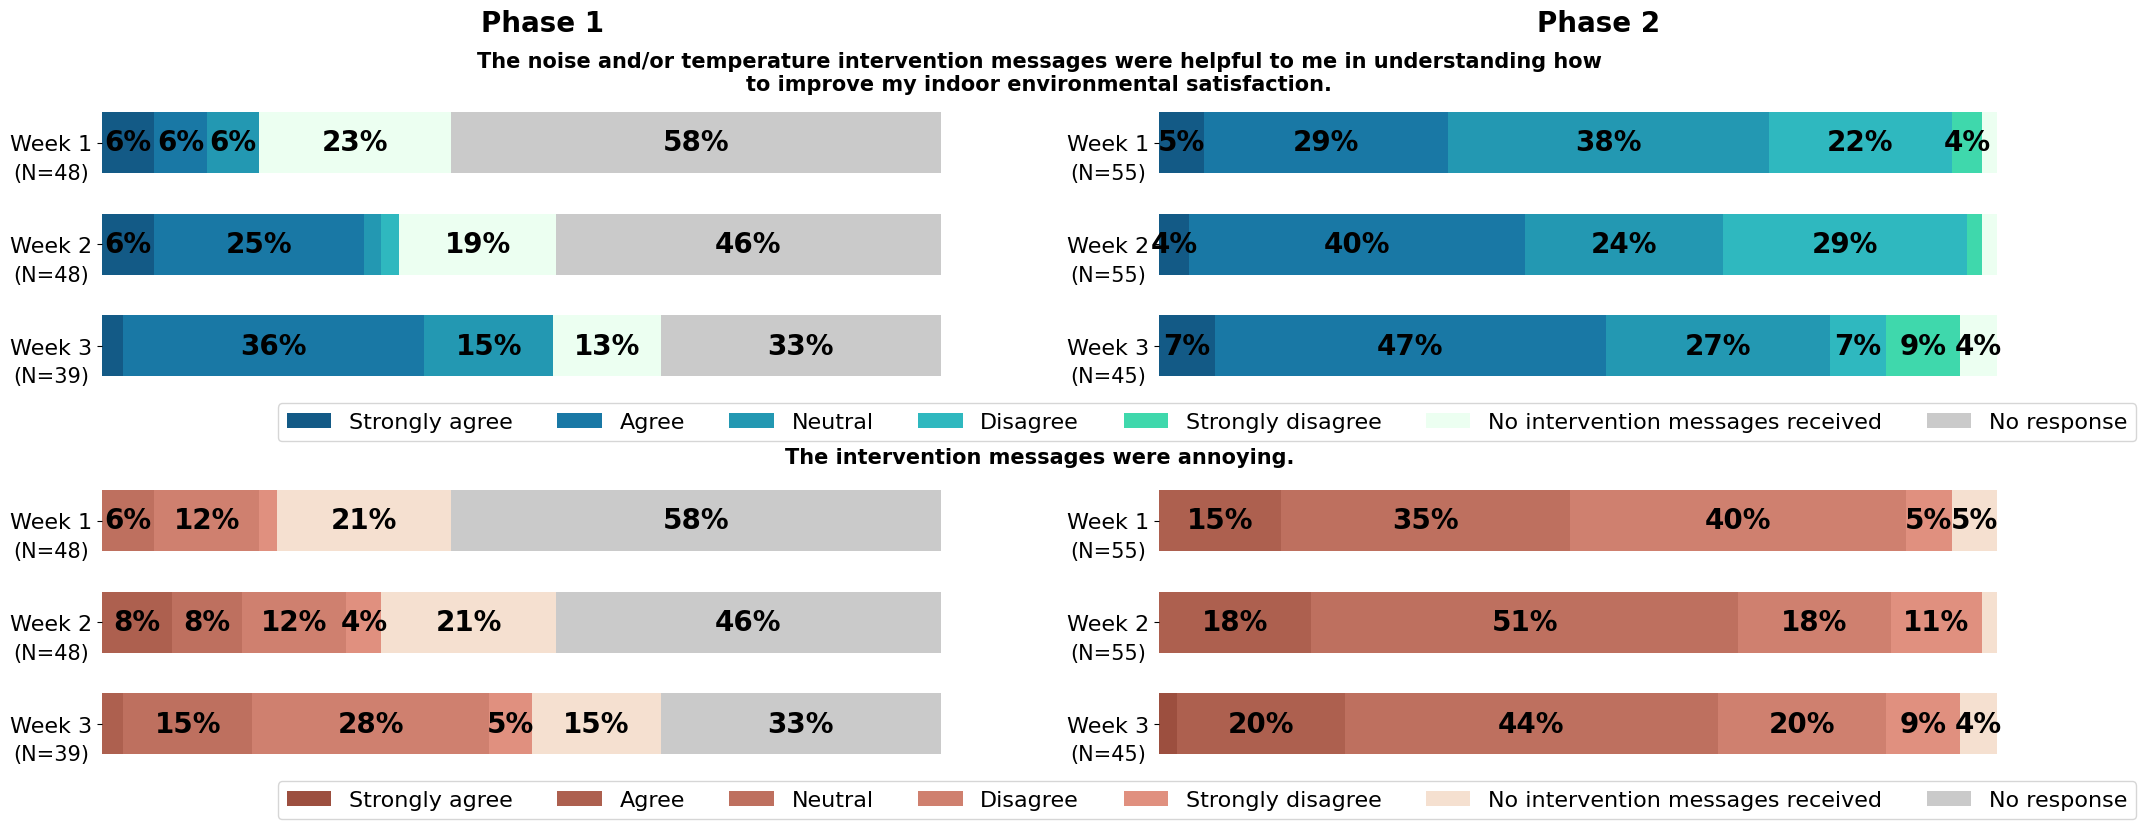

In [5]:
# Load your data
df = df_storage.copy()

# Fetch meta data
figure_name = 'fig7'
selected_questions = meta_data[figure_name]['questions']
#selected_questions = [
#'The intervention messages were annoying.',
#'The noise and/or temperature intervention messages were helpful to me in understanding how to improve my indoor environmental satisfaction.',]

categories = meta_data[figure_name]['categories']
color_palette = meta_data[figure_name]['color_palette']

# Convert columns into categorical data
df[selected_questions[0]] = df[selected_questions[0]].astype(pd.CategoricalDtype(categories=categories[0], ordered=True))
df[selected_questions[1]] = df[selected_questions[1]].astype(pd.CategoricalDtype(categories=categories[1], ordered=True))

# Visualize the data
fig, axes = plt.subplots(len(selected_questions), len(phases), figsize=(25, 10))

# Plotting loop
for row, question in enumerate(selected_questions):
    for col, phase in enumerate(phases):
        df_plot = pd.DataFrame()
        n_count = [0, 0, 0]
        
        # Compute number for bars
        df_plot = df[(df['phase']==phase)].groupby('week')[question].value_counts(normalize=True).unstack()*100
        df_plot = df_plot[df_plot.index.isin([1, 2, 3])]
        df_plot = df_plot.sort_index(ascending=False)
        
        # Compute total number of responses per week
        n_count = df[(df['phase']==phase)].groupby('week')[question].value_counts().unstack().sum(axis=1)
        n_count = n_count.values[0:3]
            
        # Set the width of the bars to fill gaps
        bar_width = 0.6  # Adjust the bar width as needed
        
        ax = axes[row][col]
        
        # Plot the data
        df_plot.plot(kind="barh",
                     stacked=True,
                     ax=ax,
                     color=color_palette[row],
                     width=bar_width,
                     legend=False  # Add this line to disable the legend
        )

        # Add phase title
        if row == 0:
            ax.set_title(f'Phase {phase}', fontsize=20, y=1.15, fontweight='bold')
        if col == 1:
            ax.legend(loc=(-1, -.125), ncol=len(my_categories[0]))

        # Annotations inside the bars
        for p in ax.patches:
            left, bottom, width, height = p.get_bbox().bounds
            if width >= 3:
                ax.annotate(f"{round(width)}%", (left + width/2, bottom + height/2), ha='center', va='center', fontsize=20, color='black', weight='bold')
        
        # Annotate number of responses
        if col == 0:
            ax.annotate(f'(N={n_count[0]})', (-1.5, 1.7), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
            ax.annotate(f'(N={n_count[1]})', (-1.5, 0.7), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
            ax.annotate(f'(N={n_count[2]})', (-1.5, -.3), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
        else: 
            ax.annotate(f'(N={n_count[0]})', (-1.5, 1.7), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
            ax.annotate(f'(N={n_count[1]})', (-1.5, 0.7), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
            ax.annotate(f'(N={n_count[2]})', (-1.5, -.3), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
        
        # Fix week label
        ax.set_yticks(ticks=[0, 1, 2], labels=['Week 3', 'Week 2', 'Week 1'])

        # Remove the axes spines
        sns.despine(ax=ax, left=True, bottom=True)

        # Remove x-axis tick labels and marks
        ax.xaxis.set_tick_params(labelcolor='none', top=False, bottom=False)

        # Remove y-axis label
        ax.set_ylabel('')

# Add row titles (question)
wrapped_title = '\n'.join(textwrap.wrap(selected_questions[0], width=90))
fig.text(0.50, 0.92, wrapped_title, ha='center', va='top', fontsize=15, fontweight='bold')
wrapped_title = '\n'.join(textwrap.wrap(selected_questions[1], width=90))
fig.text(0.50, 0.48, wrapped_title, ha='center', va='top', fontsize=15, fontweight='bold')

# Set figure size
fig_size = fig.get_size_inches()
fig.set_size_inches(fig_size[0], fig_size[1]*0.9)

plt.show()

# Save the figure
fig.savefig('./img/figure_7.pdf', bbox_inches='tight')

### Figure 8

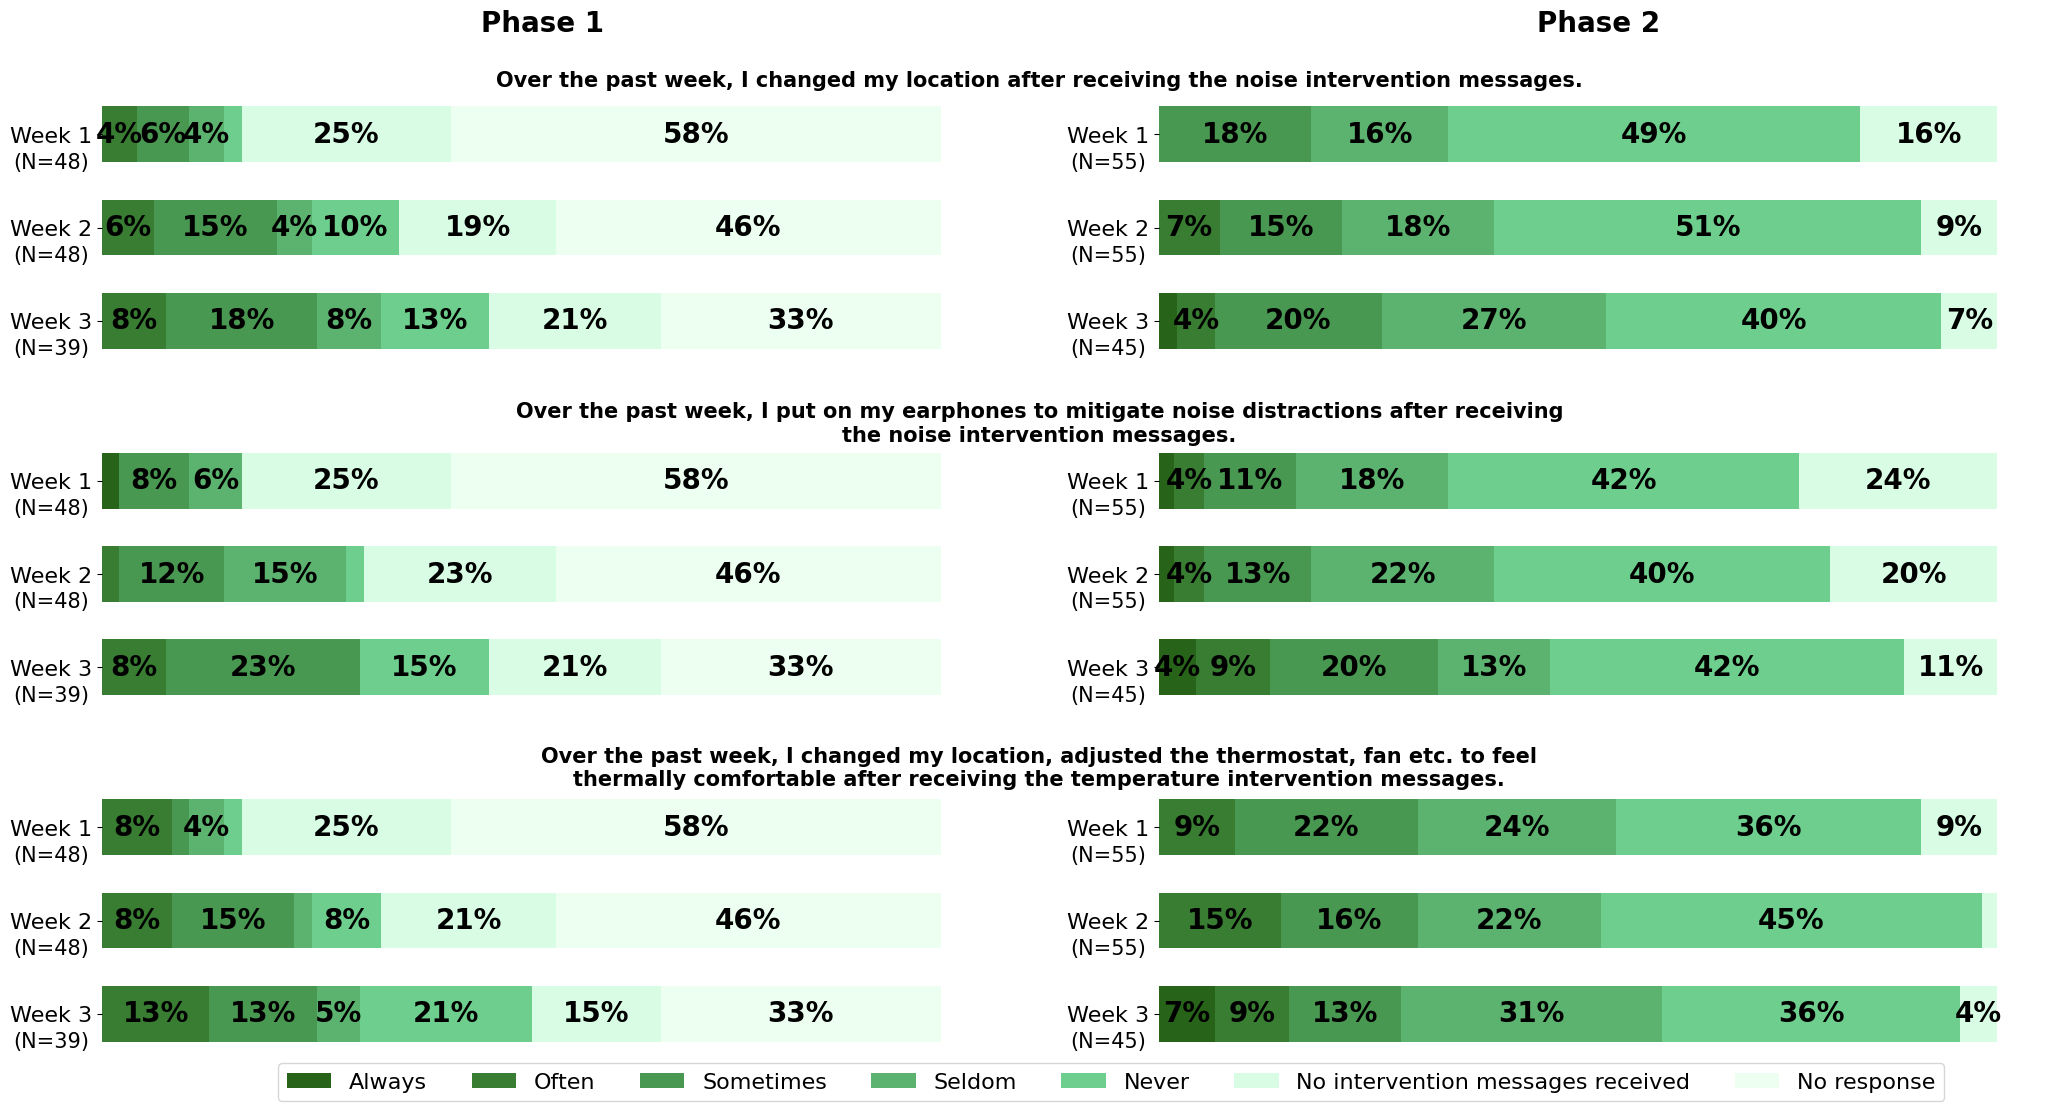

In [6]:
# Load your data
df = df_storage.copy()

# Fetch meta data
figure_name = 'fig8'
selected_questions = meta_data[figure_name]['questions']
categories = meta_data[figure_name]['categories']
color_palette = meta_data[figure_name]['color_palette']

# Convert columns into categorical data
df[selected_questions[0]] = df[selected_questions[0]].astype(pd.CategoricalDtype(categories=categories[0], ordered=True))
df[selected_questions[1]] = df[selected_questions[1]].astype(pd.CategoricalDtype(categories=categories[1], ordered=True))
df[selected_questions[2]] = df[selected_questions[2]].astype(pd.CategoricalDtype(categories=categories[2], ordered=True))

# Visualize the data
fig, axes = plt.subplots(len(selected_questions), len(phases), figsize=(25, 15))

# Plotting loop
for row, question in enumerate(selected_questions):
    for col, phase in enumerate(phases):
        df_plot = pd.DataFrame()
        n_count = [0, 0, 0]
        
        # Compute number for bars
        df_plot = df[(df['phase']==phase)].groupby('week')[question].value_counts(normalize=True).unstack()*100
        df_plot = df_plot[df_plot.index.isin([1, 2, 3])]
        df_plot = df_plot.sort_index(ascending=False)
        
        # Compute total number of responses per week
        n_count = df[(df['phase']==phase)].groupby('week')[question].value_counts().unstack().sum(axis=1)
        n_count = n_count.values[0:3]
            
        # Set the width of the bars to fill gaps
        bar_width = 0.6  # Adjust the bar width as needed
        
        ax = axes[row][col]
        
        # Plot the data
        df_plot.plot(kind="barh",
                     stacked=True,
                     ax=ax,
                     color=color_palette[2],
                     width=bar_width,
                     legend=False  # Add this line to disable the legend
        )

        # Add phase title
        if row == 0:
            ax.set_title(f'Phase {phase}', fontsize=20, y=1.15, fontweight='bold')
        if  (row==2) & (col==1):
            ax.legend(loc=(-1, -.125), ncol=len(my_categories[1]))

        # Annotations inside the bars
        for p in ax.patches:
            left, bottom, width, height = p.get_bbox().bounds
            if width >= 3:
                ax.annotate(f"{round(width)}%", (left + width/2, bottom + height/2), ha='center', va='center', fontsize=20, color='black', weight='bold')
        
        # Annotate number of responses
        if col == 0:
            ax.annotate(f'(N={n_count[0]})', (-1.5, 1.7), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
            ax.annotate(f'(N={n_count[1]})', (-1.5, 0.7), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
            ax.annotate(f'(N={n_count[2]})', (-1.5, -.3), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
        else: 
            ax.annotate(f'(N={n_count[0]})', (-1.5, 1.7), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
            ax.annotate(f'(N={n_count[1]})', (-1.5, 0.7), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
            ax.annotate(f'(N={n_count[2]})', (-1.5, -.3), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
        
        # Fix week label
        ax.set_yticks(ticks=[0, 1, 2], labels=['Week 3', 'Week 2', 'Week 1'])
        
        # Remove the axes spines
        sns.despine(ax=ax, left=True, bottom=True)

        # Remove x-axis tick labels and marks
        ax.xaxis.set_tick_params(labelcolor='none', top=False, bottom=False)

        # Remove y-axis label
        ax.set_ylabel('')

# Add row titles (question)
wrapped_title = '\n'.join(textwrap.wrap(selected_questions[0], width=90))
fig.text(0.50, 0.89, wrapped_title, ha='center', va='top', fontsize=15, fontweight='bold')
wrapped_title = '\n'.join(textwrap.wrap(selected_questions[1], width=90))
fig.text(0.50, 0.63, wrapped_title, ha='center', va='top', fontsize=15, fontweight='bold')
wrapped_title = '\n'.join(textwrap.wrap(selected_questions[2], width=90))
fig.text(0.50, 0.36, wrapped_title, ha='center', va='top', fontsize=15, fontweight='bold')

# Set figure size
fig_size = fig.get_size_inches()
fig.set_size_inches(fig_size[0], fig_size[1]*0.85)

plt.show()
# Save the figure
fig.savefig('./img/figure_8.pdf', bbox_inches='tight')

### Figure 10

In [7]:
# Load onboarding survey
csv_file_path = '../1_data/1_onboarding_survey_all_participants.csv'

# Load the CSV file into a DataFrame
df_onboarding = pd.read_csv(csv_file_path)

# Process id_participant and gender column
df_onboarding['id_participant'] = df_onboarding['Experiment tag (for example orenth04, provided by the researcher)'].str.lower()
df_onboarding['gender'] = df_onboarding['Gender']

# Fix broken id_participant
df_onboarding['id_participant'] = df_onboarding['id_participant'].str.replace(' ', '')
df_onboarding['id_participant'] = df_onboarding['id_participant'].str.replace('\n', '')
df_onboarding['enjoy_outdoor'] = df_onboarding['Do you enjoy being outdoor in Singapore?']

# Make gender dataframe smaller
df_onboarding = df_onboarding[['id_participant', 'gender', 'enjoy_outdoor']]
df_onboarding = df_onboarding.set_index('id_participant', drop=True)

# Add gender column to survey dataframe
df = df_storage.copy()
df['gender'] = df['id_participant'].apply(lambda x: df_onboarding.loc[x]['gender'])
df['enjoy_outdoor'] = df['id_participant'].apply(lambda x: df_onboarding.loc[x]['enjoy_outdoor'])

# Save data
df_storage_2 = df.copy()

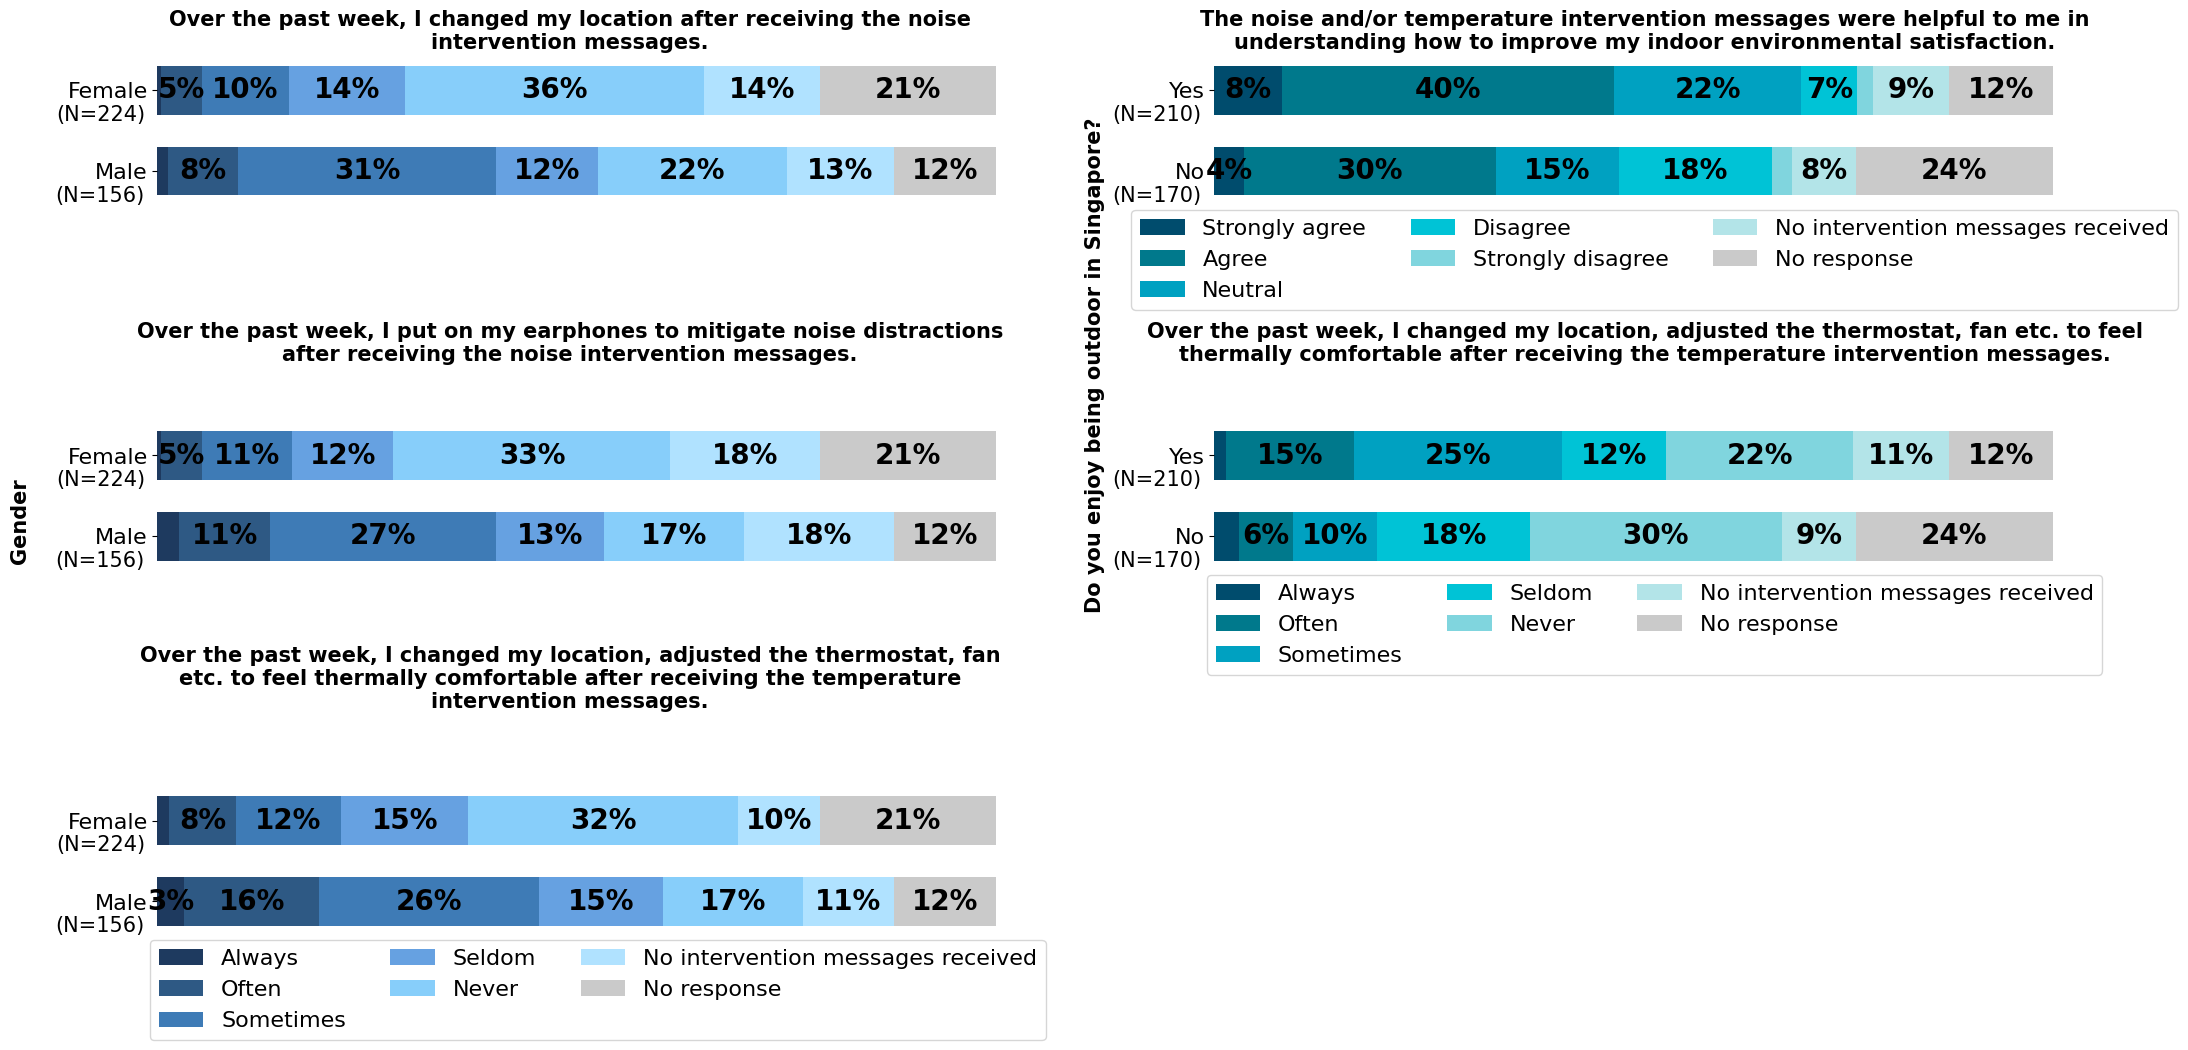

In [8]:
# Load your data
df = df_storage_2.copy()

# Fetch meta data
figure_name = 'fig10'
selected_questions = meta_data[figure_name]['questions']
categories = meta_data[figure_name]['categories']
color_palette = meta_data[figure_name]['color_palette']

# Remove 'No intervention messages received' from the responses
#for question in selected_questions:
#    df[question] = df[question].replace({'No intervention messages received': None})

# Convert columns into categorical data
df[selected_questions[0]] = df[selected_questions[0]].astype(pd.CategoricalDtype(categories=categories[0], ordered=True))
df[selected_questions[1]] = df[selected_questions[1]].astype(pd.CategoricalDtype(categories=categories[1], ordered=True))
df[selected_questions[2]] = df[selected_questions[2]].astype(pd.CategoricalDtype(categories=categories[2], ordered=True))
df[selected_questions[3]] = df[selected_questions[3]].astype(pd.CategoricalDtype(categories=categories[3], ordered=True))
df[selected_questions[4]] = df[selected_questions[4]].astype(pd.CategoricalDtype(categories=categories[4], ordered=True))

# Visualize the data
fig, axes = plt.subplots(3, 2, figsize=(25, 15), frameon=True)

# Plotting loop
for i, question in enumerate(selected_questions):
    # Set row and column
    row = i % 3
    col = i // 3
    df_plot = pd.DataFrame()
    n_count = [0, 0]
    
    # Compute number for bars
    if col==0:
        # Compute number of responses per response option
        df_plot = df.groupby('gender')[question].value_counts(normalize=True).unstack()*100
        df_plot = df_plot.sort_index(ascending=False)
        # Compute total number of responses per week
        n_count = df.groupby('gender')[question].value_counts().unstack().sum(axis=1)
    if col==1:
        # Compute number of responses per response option
        df_plot = df.groupby('enjoy_outdoor')[question].value_counts(normalize=True).unstack()*100
        df_plot = df_plot.sort_index(ascending=True)
        # Compute total number of responses per week
        n_count = df.groupby('enjoy_outdoor')[question].value_counts().unstack().sum(axis=1)
        
    # Set the width of the bars to fill gaps
    bar_width = 0.6  # Adjust the bar width as needed
    
    # Fetch current axis
    ax = axes[row][col]
    
    # Plot the data
    df_plot.plot(
        kind="barh",
        stacked=True,
        ax=ax,
        color=color_palette[i],
        width=bar_width,
        legend=False  # Add this line to disable the legend
    )

    # Annotations inside the bars
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        font_color = 'black'
        face_color = p.get_facecolor()
        if face_color==(0, 0, 0, 1):
            font_color = 'white'
        if width >= 3:
            ax.annotate(f"{round(width)}%", (left + width/2, bottom + height/2), ha='center', va='center', fontsize=20, color=font_color, weight='bold')

    # Annotate number of responses
    if col == 0:
        ax.annotate(f'(N={n_count.loc[df_plot.index[1]]})', (-1.5, 0.7), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
        ax.annotate(f'(N={n_count.loc[df_plot.index[0]]})', (-1.5, -.3), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
    else: 
        ax.annotate(f'(N={n_count.loc[df_plot.index[1]]})', (-1.5, 0.7), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
        ax.annotate(f'(N={n_count.loc[df_plot.index[0]]})', (-1.5, -.3), ha='right', va='center', fontsize=15, color='black', annotation_clip=False)
    
    # Remove the axes spines
    sns.despine(ax=ax, left=True, bottom=True)

    # Remove x-axis tick labels and marks
    ax.xaxis.set_tick_params(labelcolor='none', top=False, bottom=False)

    # Remove y-axis label
    ax.set_ylabel('')
    

# Add row titles (question)
title_length = 75
wrapped_title = '\n'.join(textwrap.wrap(selected_questions[0], width=title_length))
fig.text(0.29, 0.89, wrapped_title, ha='center', va='top', fontsize=15, fontweight='bold')
wrapped_title = '\n'.join(textwrap.wrap(selected_questions[1], width=title_length))
fig.text(0.29, 0.63, wrapped_title, ha='center', va='top', fontsize=15, fontweight='bold')
wrapped_title = '\n'.join(textwrap.wrap(selected_questions[2], width=title_length))
fig.text(0.29, 0.36, wrapped_title, ha='center', va='top', fontsize=15, fontweight='bold')
wrapped_title = '\n'.join(textwrap.wrap(selected_questions[3], width=title_length))
fig.text(0.72, 0.89, wrapped_title, ha='center', va='top', fontsize=15, fontweight='bold')
wrapped_title = '\n'.join(textwrap.wrap(selected_questions[4], width=85))
fig.text(0.72, 0.63, wrapped_title, ha='center', va='top', fontsize=15, fontweight='bold')

# Add y-axis titles
fig.text(0.07, 0.5, 'Gender', ha='center', va='top', fontsize=15, fontweight='bold', rotation=90)
fig.text(0.50, 0.8, 'Do you enjoy being outdoor in Singapore?', ha='center', va='top', fontsize=15, fontweight='bold', rotation=90)

# Add legend
#axes[2][0].legend(loc=(0, -.05), ncol=3)
#axes[0][1].legend(loc=(0, -.05), ncol=3)
#axes[1][1].legend(loc=(0, -.05), ncol=3)

axes[2][0].legend(loc="upper center", bbox_to_anchor=(0.5, 0.1), ncol=3)
axes[0][1].legend(loc="upper center", bbox_to_anchor=(0.5, 0.1), ncol=3)
axes[1][1].legend(loc="upper center", bbox_to_anchor=(0.5, 0.1), ncol=3)


# Make more vertical space for legends
#plt.subplots_adjust(hspace=1.1)  # Increase spacing between rows
plt.subplots_adjust(hspace=1.15, top=0.86)  # Increase spacing between rows


# Remove bottom right subplot
fig.delaxes(axes[2][1])

# Set figure size
fig_size = fig.get_size_inches()
fig.set_size_inches(fig_size[0], fig_size[1]*0.8)

plt.show()
# Save the figure
fig.savefig('./img/figure_10.pdf', bbox_inches='tight')